In [7]:
!pip install gitpython

!pip install numpy matplotlib scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00


In [10]:
#Download the data
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

data_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt "
data_filename = "co2_data.txt"

urllib.request.urlretrieve(data_url, data_filename)

('co2_data.txt', <email.message.Message at 0x7e0eb5553310>)

In [11]:
# Load data and mask missing values
data = np.genfromtxt(data_filename, skip_header=72)
data = np.ma.masked_invalid(data)

In [13]:
# Monthly Averages
monthly_averages = data[:, 3]  # Assuming the "average" column is at index 3

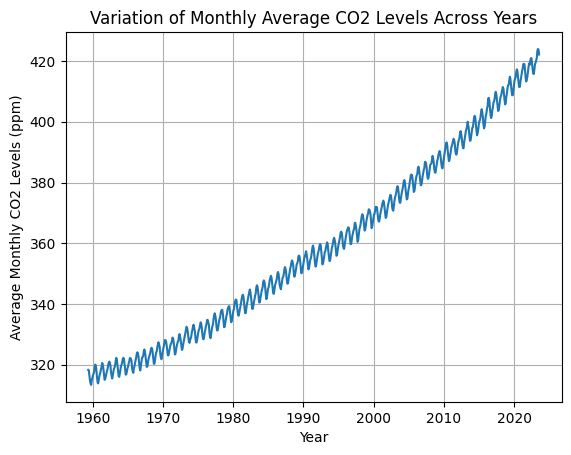

In [14]:
# Step 4: Plot Monthly Averages
plt.plot(data[:, 2], monthly_averages)
plt.xlabel("Year")
plt.ylabel("Average Monthly CO2 Levels (ppm)")
plt.title("Variation of Monthly Average CO2 Levels Across Years")
plt.grid(True)
plt.show()

In [15]:
# Calculate differences between consecutive monthly averages
differences = np.diff(monthly_averages)

In [19]:
# Convert to rates by dividing by time interval
time_intervals = np.diff(data[:, 2])
rate_of_change = differences / time_intervals

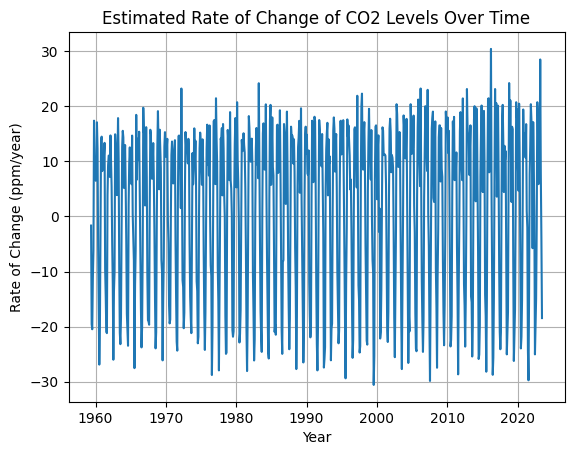

In [20]:
# Step 6: Plot Rate of Change
plt.plot(data[:-1, 2], rate_of_change)  # Plot rate_of_change vs. time
plt.xlabel("Year")
plt.ylabel("Rate of Change (ppm/year)")
plt.title("Estimated Rate of Change of CO2 Levels Over Time")
plt.grid(True)
plt.show()